# Import Libraries



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Generate Dataset

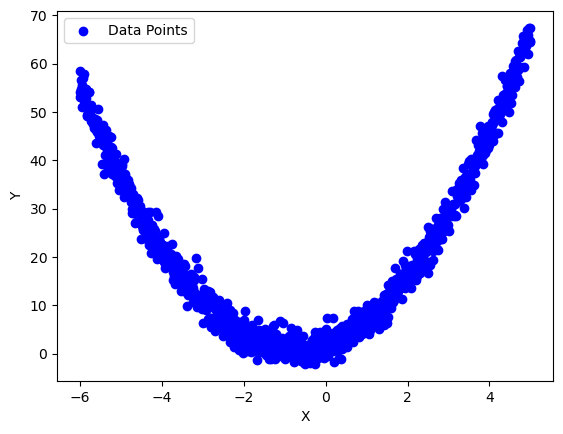

In [2]:
a = 2.0
b = 3.0
c = 4.0

n = 1000

x = np.linspace(-6, 5, n)
noise = np.random.normal(-2, 2, n)
y = a * x**2 + b * x + c + noise

# plot
plt.scatter(x, y, label='Data Points', color='blue')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()



# Initializa Parameters

In [3]:
a_init = np.random.rand(1)
b_init = np.random.rand(1)
c_init = np.random.rand(1)

default_learning_rate = 0.02
epochs = 100000

# generate all random-indexes

In [4]:

random_indexes = np.random.randint(0,len(x),epochs)


In [5]:
def AMSGrad(a,b,c,learning_rate):
    sa = 0
    sb = 0
    sc = 0
    
    va = 0
    vb = 0
    vc = 0
    
    va_hat = 0
    vb_hat = 0
    vc_hat = 0
    
    sa_hat = 0
    sb_hat = 0
    sc_hat = 0
    
    epsilon = 0.00000001
    beta1 = 0.9
    beta2 = 0.999
    for epoch in range(1,epochs+1):
        random_index = random_indexes[epoch-1]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = a * x_i**2 + b * x_i + c
        error = (y_i - y_pred)
        
        da =  error * -1 * x_i**2
        db =  error * -1 * x_i
        dc =  error * -1 * 1
        
        beta1_current = beta1/epoch
        va = beta1_current * va + (1 - beta1_current) * da 
        vb = beta1_current * vb + (1 - beta1_current) * db        
        vc = beta1_current * vc + (1 - beta1_current) * dc        

        sa = beta2 * sa +(1-beta2) * (da ** 2)
        sb = beta2 * sb +(1-beta2) * (db ** 2)
        sc = beta2 * sc +(1-beta2) * (dc ** 2)

        sa_hat = max(sa,sa_hat)
        sb_hat = max(sb,sb_hat)
        sc_hat = max(sc,sc_hat)
        
        learning_rate_current = learning_rate / math.sqrt(epoch)
        a = a - (learning_rate_current / (math.sqrt(sa_hat)+epsilon)) * va
        b = b - (learning_rate_current / (math.sqrt(sb_hat)+epsilon)) * vb
        c = c - (learning_rate_current / (math.sqrt(sc_hat)+epsilon)) * vc

    return a,b,c

a_AMSGrad,b_AMSGrad,c_AMSGrad = AMSGrad(a_init,b_init, c_init,default_learning_rate)
print("AMSGrad Trained a:", a_AMSGrad)
print("AMSGrad Trained b:", b_AMSGrad)
print("AMSGrad Trained c:", c_AMSGrad)

AMSGrad Trained a: [1.9647978]
AMSGrad Trained b: [2.97404682]
AMSGrad Trained c: [2.3190147]


In [6]:
def AdamX(a,b,c,learning_rate):
    sa = 0
    sb = 0
    sc = 0
    
    va = 0
    vb = 0 
    vc = 0
    
    sa_hat = 0
    sb_hat = 0
    sc_hat = 0
    
    epsilon = 0.00000001
    beta1 = 0.9
    beta2 = 0.999 
    
    for epoch in range(1,epochs+1):
        random_index = random_indexes[epoch-1]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = a * x_i**2 + b * x_i + c
        error = (y_i - y_pred)
        
        da =  error * -1 * x_i**2
        db =  error * -1 * x_i
        dc =  error * -1 * 1
        
        beta1_current = beta1/epoch
        va = beta1_current * va + (1 - beta1_current) * da 
        vb = beta1_current * vb + (1 - beta1_current) * db        
        vc = beta1_current * vc + (1 - beta1_current) * dc        

        sa = beta2 * sa +(1-beta2) * (da ** 2)
        sb = beta2 * sb +(1-beta2) * (db ** 2)
        sc = beta2 * sc +(1-beta2) * (dc ** 2)

        if(epoch==1):
            sa_hat = sa
            sb_hat = sb
            sc_hat = sc
        else:
            beta1_past= beta1/(epoch-1)
            sa_hat = max((1-beta1_current)**2/(1-beta1_past)**2 * sa_hat,sa)
            sb_hat = max((1-beta1_current)**2/(1-beta1_past)**2 * sb_hat,sb)
            sc_hat = max((1-beta1_current)**2/(1-beta1_past)**2 * sc_hat,sc)
              
        learning_rate_current = learning_rate / math.sqrt(epoch)
        a = a - (learning_rate_current / (math.sqrt(sa_hat)+epsilon))* va
        b = b - (learning_rate_current / (math.sqrt(sb_hat)+epsilon)) * vb
        c = c - (learning_rate_current / (math.sqrt(sc_hat)+epsilon)) * vc
    return a,b,c

a_AdamX,b_AdamX,c_AdamX = AdamX(a_init,b_init,c_init,default_learning_rate)
print("AdamX Trained a:", a_AdamX)
print("AdamX Trained b:", b_AdamX)
print("AdamX Trained c:", c_AdamX)

AdamX Trained a: [1.96914412]
AdamX Trained b: [2.97069103]
AdamX Trained c: [2.23250882]


In [7]:
def CalculateMSE(x,y,a,b,c):
    sigma_error = 0
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        y_pred = a * x_i**2 + b * x_i + c
        error = (y_i - y_pred)
        sigma_error +=error**2

    MSE = sigma_error/n
    return MSE
 
AMSGrad_MSE = CalculateMSE(x,y,a_AMSGrad,b_AMSGrad,c_AMSGrad)
AdamX_MSE = CalculateMSE(x,y,a_AdamX,b_AdamX,c_AdamX)

print('AMSGrad_MSE: ', AMSGrad_MSE)
print('AdamX_MSE: ', AdamX_MSE)


AMSGrad_MSE:  [4.06832532]
AdamX_MSE:  [4.05406224]


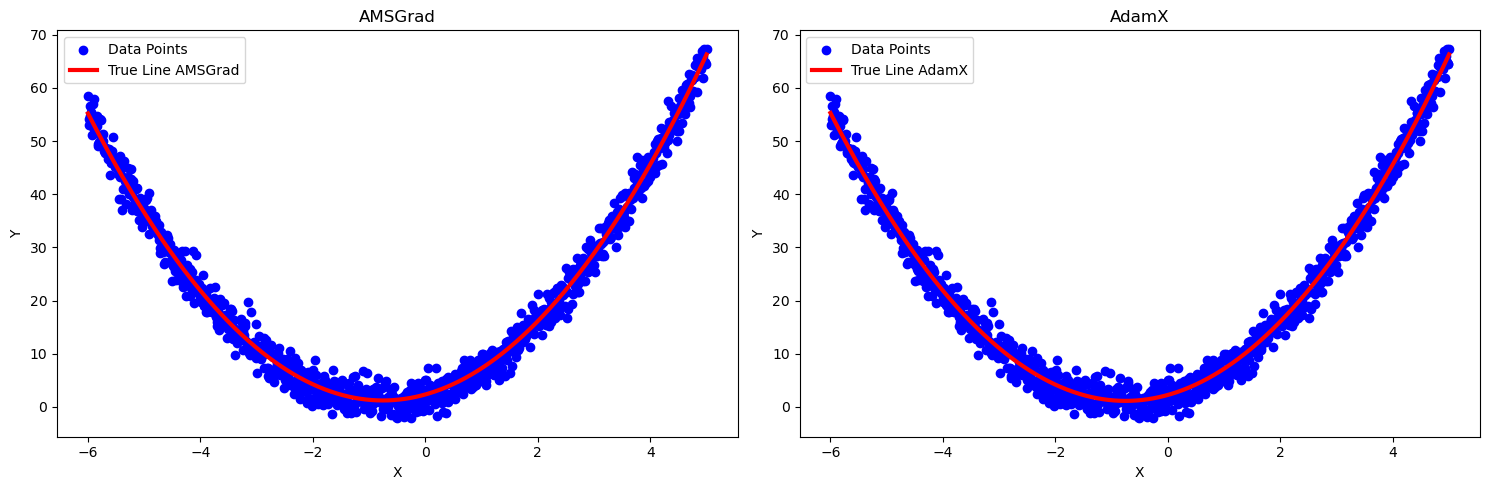

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(x, y, label='Data Points', color='blue') 
axes[0].plot(x, a_AMSGrad * x**2  + b_AMSGrad*x + c_AMSGrad , label=f'True Line AMSGrad', color='red', linestyle='-', linewidth=3)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_title('AMSGrad')
axes[0].legend()

axes[1].scatter(x, y, label='Data Points', color='blue') 
axes[1].plot(x, a_AdamX * x**2  + b_AdamX*x + c_AdamX , label=f'True Line AdamX', color='red', linestyle='-', linewidth=3)
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_title('AdamX')
axes[1].legend()

plt.tight_layout()
plt.show()
